<a href="https://colab.research.google.com/github/DiGit22476/demo/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: import csv file

import pandas as pd

# Replace 'your_file.csv' with the actual file name
df = pd.read_csv('/content/drive/MyDrive/LearntubeProjects/Project1/WA_Fn-UseC_-Telco-Customer-Churn.csv')



In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


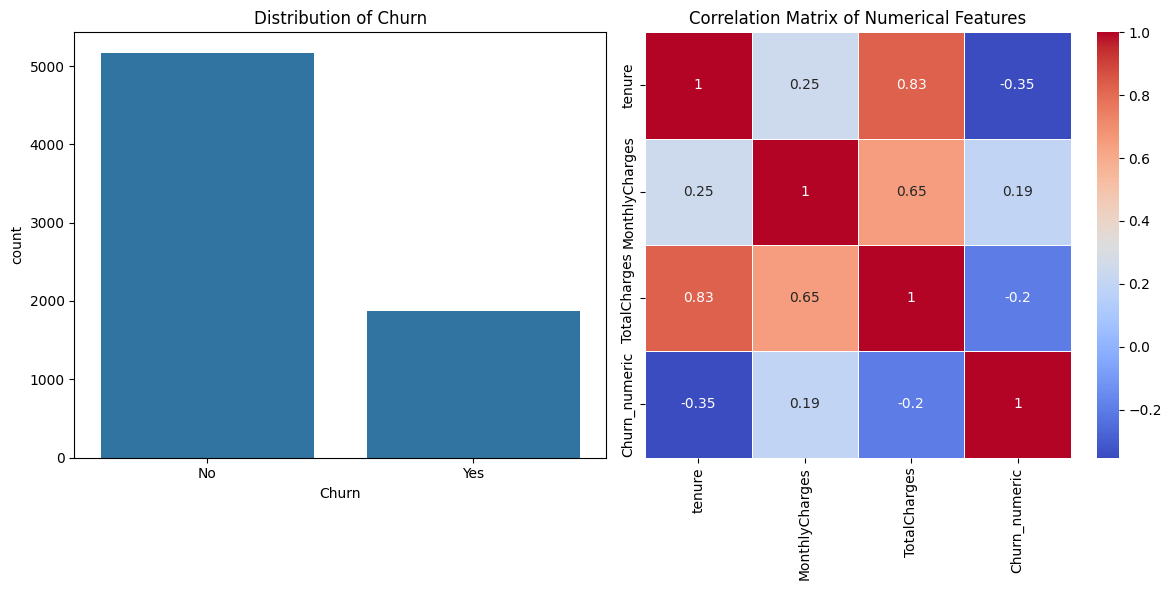

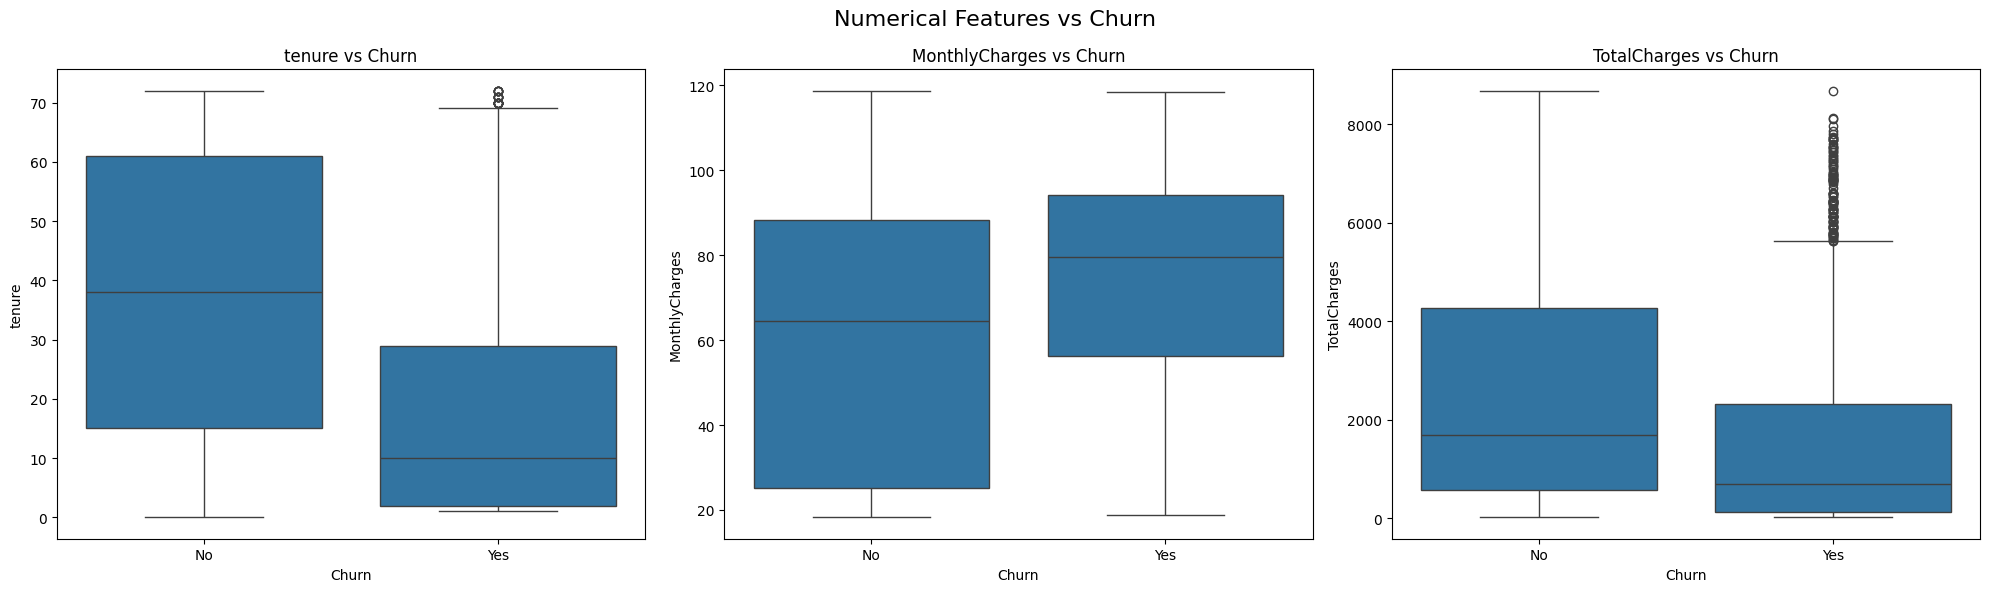

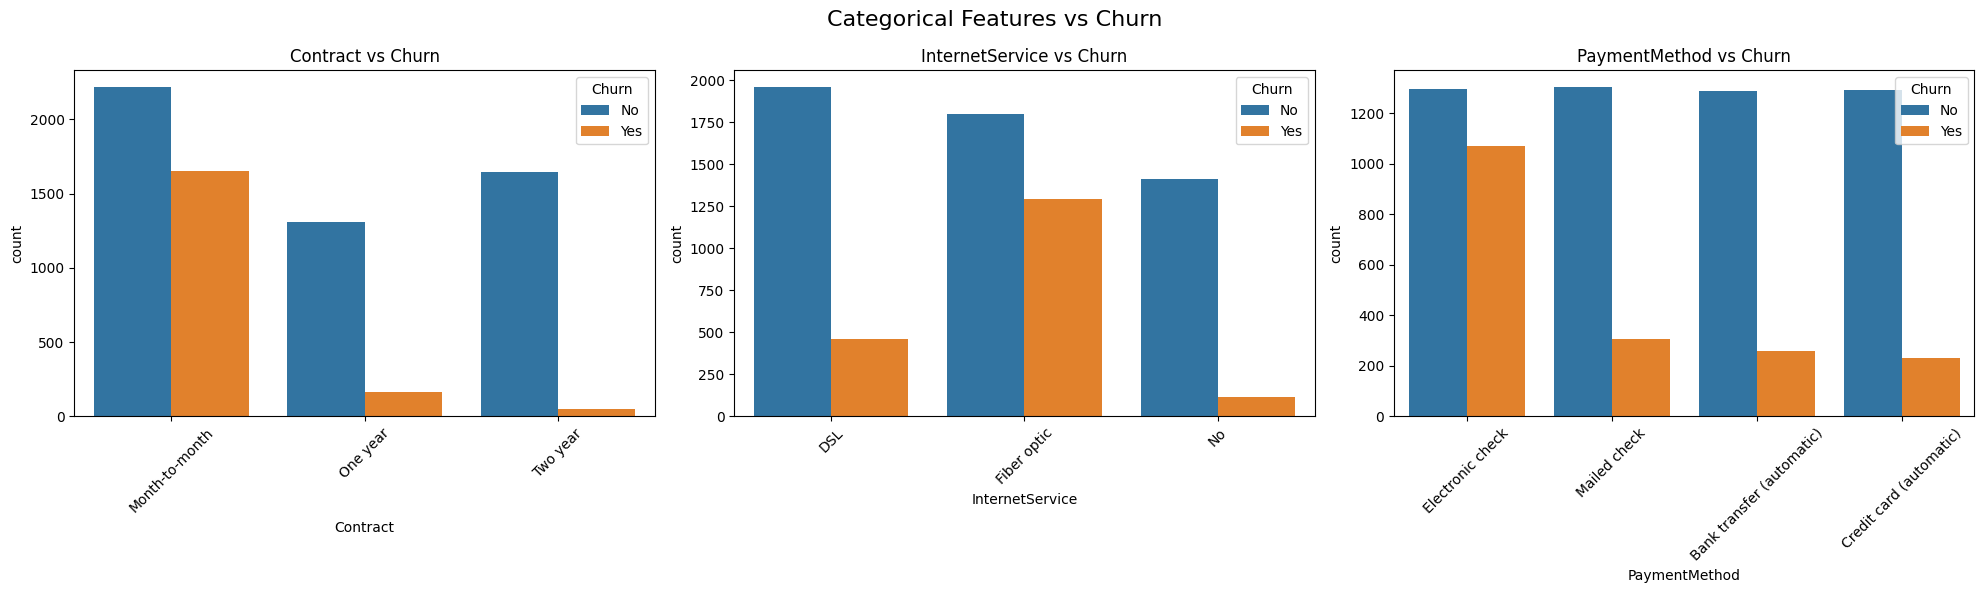


Statistical Tests:

tenure:
T-statistic: -31.57955051135377
P-value: 7.99905796059022e-205

MonthlyCharges:
T-statistic: 16.536738015936308
P-value: 2.7066456068884154e-60

TotalCharges:
T-statistic: nan
P-value: nan

Contract:
Chi-square statistic: 1184.5965720837926
P-value: 5.863038300673391e-258

InternetService:
Chi-square statistic: 732.309589667794
P-value: 9.571788222840544e-160

PaymentMethod:
Chi-square statistic: 648.1423274814
P-value: 3.6823546520097993e-140


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df is already loaded
# Convert 'TotalCharges' to numeric, replacing empty strings with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert 'Churn' to numeric (0 for 'No', 1 for 'Yes')
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Churn rate
churn_rate = df['Churn'].value_counts(normalize=True)
print("\nChurn rate:")
print(churn_rate)

# Correlation matrix for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']
correlation_matrix = df[numerical_features].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Average tenure for churned vs non-churned customers
tenure_by_churn = df.groupby('Churn')['tenure'].mean()
print("\nAverage tenure by churn status:")
print(tenure_by_churn)

# Contract type distribution for churned vs non-churned customers
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
print("\nContract type distribution by churn status:")
print(contract_churn)

# Internet service type for churned vs non-churned customers
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
print("\nInternet service type by churn status:")
print(internet_churn)

# Visualizations
plt.figure(figsize=(12, 6))

# Churn Distribution
plt.subplot(121)
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')

# Correlation Heatmap
plt.subplot(122)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')

plt.tight_layout()
plt.show()

# Numerical Features vs Churn
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Numerical Features vs Churn', fontsize=16)

for i, feature in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.boxplot(x='Churn', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()

# Categorical Features vs Churn
categorical_features = ['Contract', 'InternetService', 'PaymentMethod']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Categorical Features vs Churn', fontsize=16)

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistical Tests
print("\nStatistical Tests:")

# T-test for numerical features
for feature in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    churned = df[df['Churn'] == 'Yes'][feature]
    not_churned = df[df['Churn'] == 'No'][feature]
    t_stat, p_value = stats.ttest_ind(churned, not_churned)
    print(f"\n{feature}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

# Chi-square test for categorical features
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\n{feature}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")

Model

In [9]:
! pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.2 MB/s eta 0:00:00


In [25]:
df['Churn_numeric'].value_counts()

,count
Churn_numeric,


Model Performance:
Accuracy: 0.7942

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:
[[943  93]
 [197 176]]

Cross-validation scores: [0.78921221 0.79347055 0.76863023 0.79119318 0.79616477]
Mean CV score: 0.7877

Feature importance ranking:
1. TotalCharges (0.166807)
2. tenure (0.147586)
3. MonthlyCharges (0.145391)
4. Contract_Month-to-month (0.050624)
5. OnlineSecurity_No (0.029761)
6. TechSupport_No (0.029677)
7. PaymentMethod_Electronic check (0.026823)
8. InternetService_Fiber optic (0.022476)
9. DeviceProtection_No (0.018643)
10. gender_Male (0.017676)
11. gender_Female (0.017419)
12. OnlineBackup_No (0.016756)
13. Partner_Yes (0.015849)
14. Contract_Two year (0.0

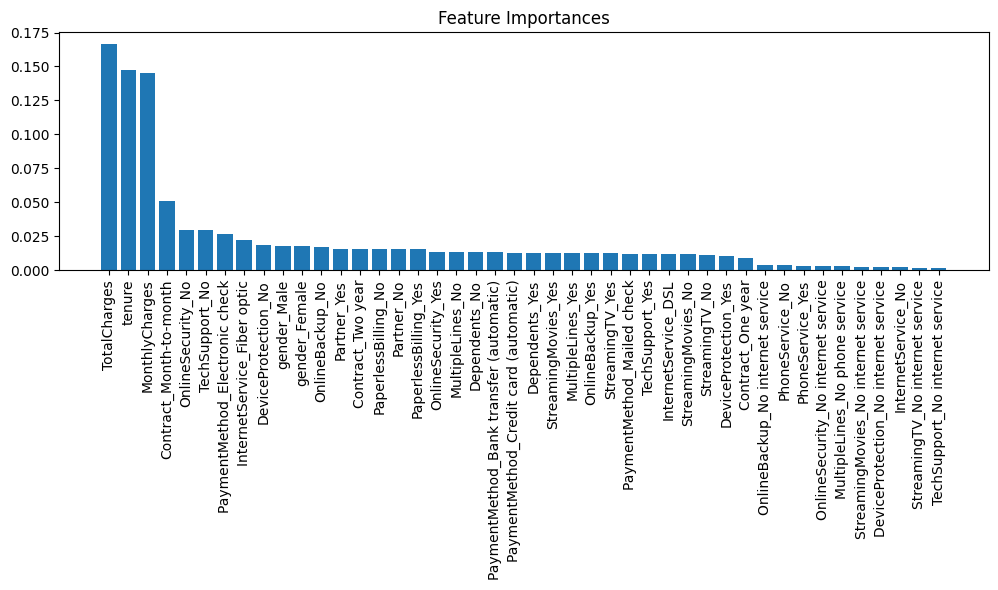

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/drive/MyDrive/LearntubeProjects/Project1/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preprocess the data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Separate features and target
X = df.drop(['Churn', 'Churn_numeric', 'customerID'], axis=1)
y = df['Churn_numeric']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model performance
print("Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

# Get feature names after one-hot encoding
onehot_encoder = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

# Combine all feature names
feature_names = np.concatenate([numeric_features, cat_feature_names])

# Get feature importances
feature_importance = model.named_steps['classifier'].feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Print the feature ranking
print("\nFeature importance ranking:")
for f in range(len(feature_names)):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importance[indices[f]]))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_names)), feature_importance[indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()